# Analyzing the Hotel Bookings Data Set using Python

By: Thomas Simon

First, we'll start with inputting the Python libraries.

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
import matplotlib.axes as ax
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

**Data Cleansing**

The data set already looks clean, so we'll move to understanding the insights.

**Insights**

Here, we'll look at a descriptive overview of the dataset and it's respective columns.

In [79]:
dataframe_raw = pd.read_csv("Hotel Bookings - Capstone 2 Data Set, Thomas Simon.csv", header = 0)
dataframe_raw.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Next, we'll look at the number of cancellations for specifically months April through August as they tend to have the greatest amount of cancellations total.

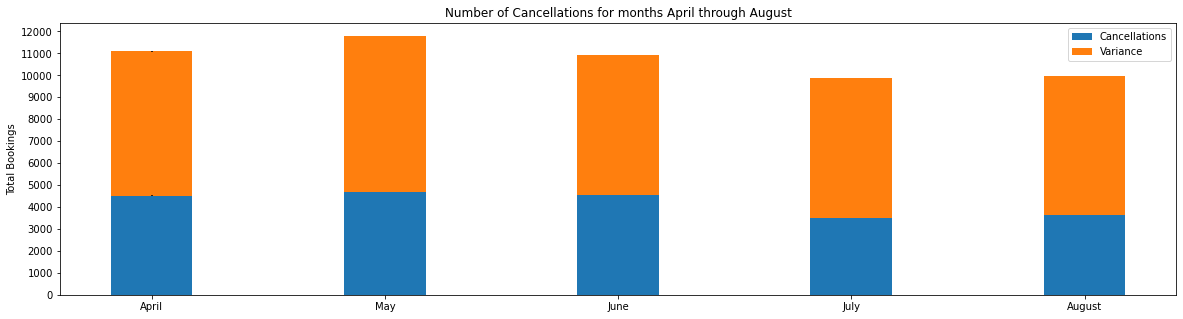

In [66]:
N = 5
cancellations = (4524, 4677, 4535, 3483, 3641)
variance = (6565, 7114, 6404, 6402, 6347)
cancellationsStd = (2, 3, 4, 1, 2)
varianceStd = (3, 5, 2, 3, 3)
ind = np.arange(N)
width = 0.35       

p1 = plt.bar(ind, cancellations, width, yerr=cancellationsStd)
p2 = plt.bar(ind, variance, width,
             bottom=cancellations, yerr=varianceStd)

plt.ylabel('Total Bookings')
plt.title('Number of Cancellations for months April through August')
plt.xticks(ind, ('April', 'May', 'June', 'July', 'August'))
plt.yticks(np.arange(0, 13000, 1000))
plt.legend((p1[0], p2[0]), ('Cancellations', 'Variance'))

plt.show()

Then, we'll take a look at the total number of cancellations by market segment.

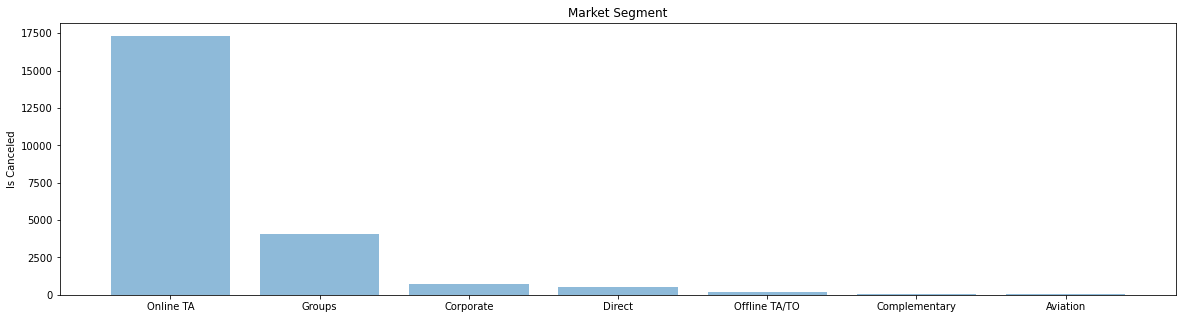

In [71]:
objects = ('Online TA', 'Groups', 'Corporate', 'Direct', 'Offline TA/TO', 'Complementary', 'Aviation')
y_pos = np.arange(len(objects))
performance = [17317,4086,696,548,201,72,46]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Is Canceled')
plt.title('Market Segment')

plt.show()

After that, we'll make a pie chart to understand which market segments most incur revenue loss as a result of these cancellations.

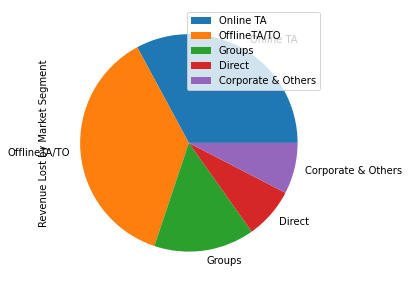

In [65]:
df = pd.DataFrame({'Revenue Lost by Market Segment': [4.330, 4.87 , 1.97, 1, 1],
                   'radius': [2439.7, 3051.8, 3378.1, 1, 1]},
                  index=['Online TA', 'OfflineTA/TO', 'Groups','Direct', 'Corporate & Others'])
plot = df.plot.pie(y='Revenue Lost by Market Segment', figsize=(5, 5))

Lastly, we'll make a line chart to look into City Hotels and how cancellations play a role month to month.

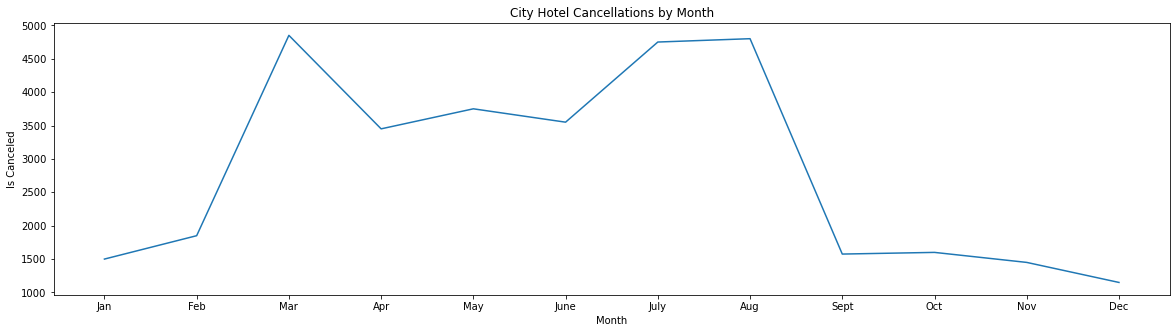

In [78]:
Month = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
Unemployment_Rate = [1500,1850,4850,3450,3750,3550,4750,4800,1575,1600,1450,1150]
  
plt.plot(Month, Unemployment_Rate)
plt.title('City Hotel Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Is Canceled')
plt.show()